In [1]:
from Data_Loaders import loaders
from VGAE import VGAEModel
from pathlib import Path
import torch
import matplotlib.pyplot as plt
# Plot
import networkx as nx
# Ensure deterministic behavior
torch.backends.cudnn.deterministic = True
torch.manual_seed(hash("by removing stochasticity") % 2**32 - 1)
torch.cuda.manual_seed_all(hash("so runs are repeatable") % 2**32 - 1)


BASE_DIR = Path("/home/nbiescas/Desktop/CVC/CVC_internship") #or Path().absolute()
DATA_PATH = BASE_DIR / "omniglot.npz"
from training import device

import dgl

In [2]:
model = VGAEModel(2, 10, 15)
model.load_state_dict(torch.load('/home/nbiescas/Desktop/CVC/CVC_internship/CheckPoints/check_point_1.pth'))

<All keys matched successfully>

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph(G, position, ax):
    #fig, ax = plt.subplots(figsize=(5, 7))
      
    # Draw nodes and edges
    nx.draw_networkx_nodes(G, ax=ax, pos=position)
    nx.draw_networkx_edges(G, ax=ax, pos=position)
    
    # Add labels
    node_labels = {n: n for n in G.nodes()}
    nx.draw_networkx_labels(G, ax=ax, pos=position, labels=node_labels)
    
    # Customize plot appearance
    ax.set_title("Graph Visualization")
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    
    plt.tight_layout()

In [3]:
train_loader, val_loader, test_loader = loaders(DATA_PATH)

In [10]:
graph, _ = next(iter(train_loader))

In [14]:
transform = dgl.transforms.RowFeatNormalizer(subtract_min=True, node_feat_names=['feat'])

In [15]:
hey = transform(graph)

In [16]:
torch.set_printoptions(profile='full')
graph.ndata['feat']

tensor([[0.5000, 0.5000],
        [0.5005, 0.4995],
        [0.5848, 0.4152],
        [0.5867, 0.4133],
        [0.5930, 0.4070],
        [0.5058, 0.4942],
        [0.5053, 0.4947],
        [0.5037, 0.4963],
        [0.5029, 0.4971],
        [0.5027, 0.4973],
        [0.6983, 0.3017],
        [0.5024, 0.4976],
        [0.5014, 0.4986],
        [0.5013, 0.4987],
        [0.5012, 0.4988],
        [0.5011, 0.4989],
        [0.5009, 0.4991],
        [0.5008, 0.4992],
        [0.5009, 0.4991],
        [0.5011, 0.4989],
        [0.5012, 0.4988],
        [0.5014, 0.4986],
        [0.5013, 0.4987],
        [0.5015, 0.4985],
        [0.5015, 0.4985],
        [0.5019, 0.4981],
        [0.5019, 0.4981],
        [0.5022, 0.4978],
        [0.5025, 0.4975],
        [0.5034, 0.4966],
        [0.5029, 0.4971],
        [0.5027, 0.4973],
        [0.5024, 0.4976],
        [0.5025, 0.4975],
        [0.5039, 0.4961],
        [0.5077, 0.4923],
        [0.5081, 0.4919],
        [0.5055, 0.4945],
        [0.5

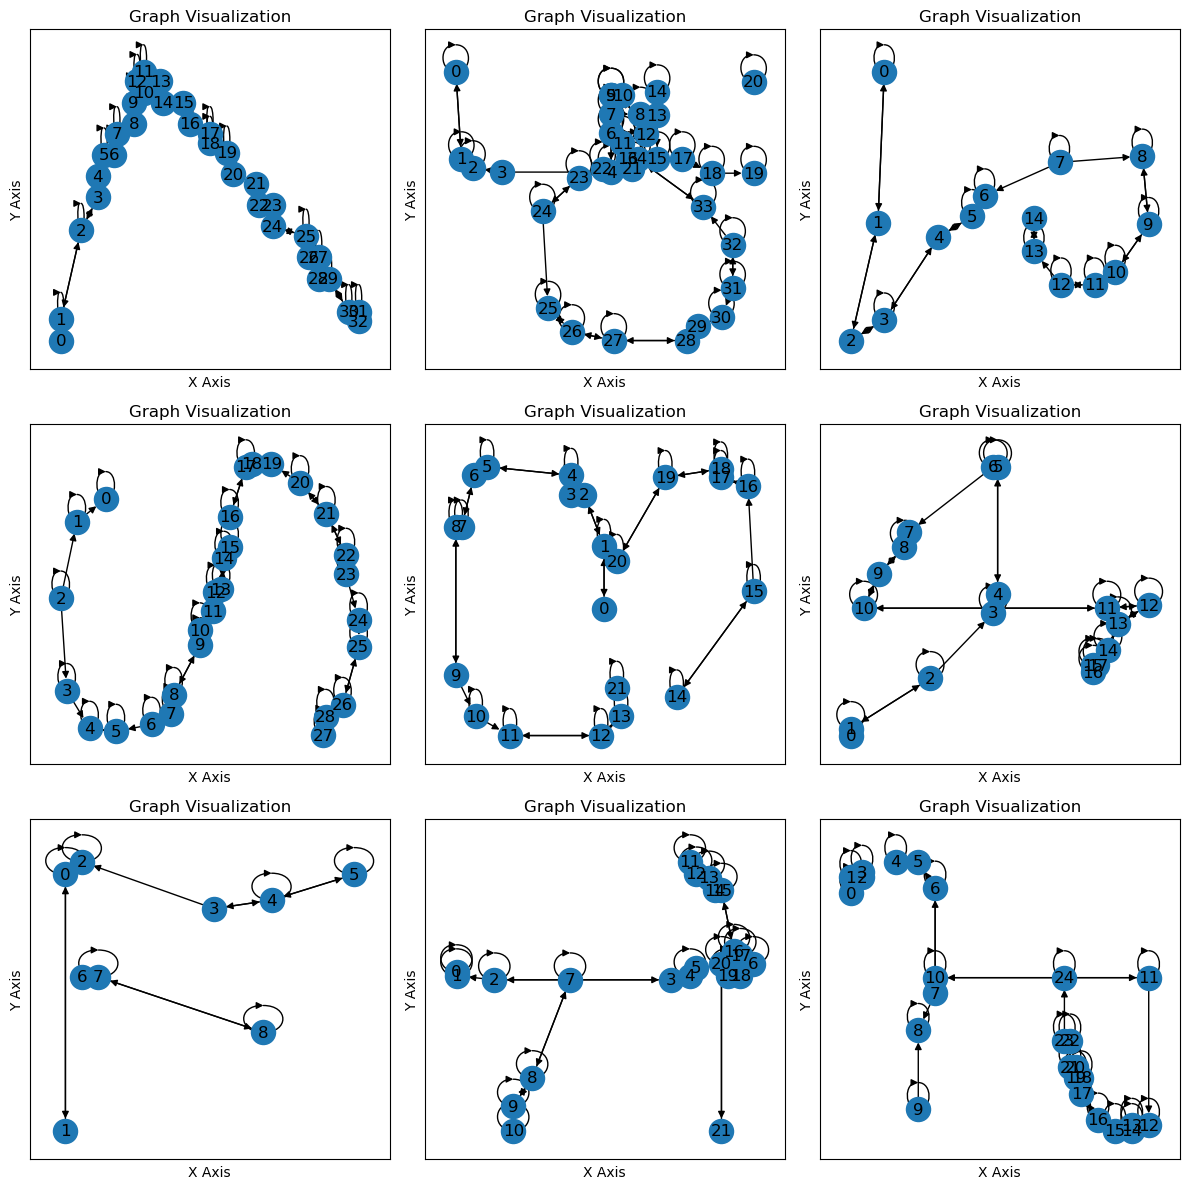

In [32]:
fig, idx = plt.subplots(3, 3, figsize=(12, 12))
test_loader_iter = iter(train_loader)
for i in range(3):
    for j in range(3):
        axis = idx[i, j]
        dgl_graph, _ = next(test_loader_iter)
        G = dgl.to_networkx(dgl_graph)
        features = {node_id:row for node_id, row in enumerate(dgl_graph.ndata["feat"].numpy())}
        plot_graph(G, features, axis)

plt.show()